In [26]:
import pandas as pd

# Cargando el dataset
url = 'https://mediasupport.com.ar/datasets/Dataset-4-ADRIAN-FERNANDEZ.csv'
data = pd.read_csv(url, sep = ',')

# Mostrar las primeras filas del conjunto de datos para comprender su estructura y contenido.
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


# Hallazgos Generales:

* El dataset tiene 91,713 registros.

* La mayoría de las columnas no tienen valores faltantes significativos. Sin embargo, hay algunas excepciones:

  * age: 4.61% de los datos faltantes.

  * bmi: 3.74% de los datos faltantes.

  * height: 1.45% de los datos faltantes.

* Las variables como **age**, **bmi**, **height** varían considerablemente entre pacientes, lo cual es esperado dada la naturaleza de estos datos clínicos.

1. Factores de Riesgo: Identificar qué factores están más fuertemente asociados con la mortalidad hospitalaria. Esto puede incluir análisis de correlación y, posiblemente, modelos predictivos.

2. Análisis Demográfico: Examinar cómo las tasas de mortalidad varían en diferentes grupos demográficos. Esto requerirá agrupar los datos por características como edad, género y etnia.

3. Enfermedades y Condiciones: Analizar la prevalencia de ciertas condiciones médicas en pacientes que fallecieron en el hospital. Esto implicará un análisis detallado de las columnas relacionadas con condiciones médicas.

4. **Eficiencia** del Tratamiento: Investigar si ciertos tratamientos o procedimientos tienen un impacto en las tasas de supervivencia.

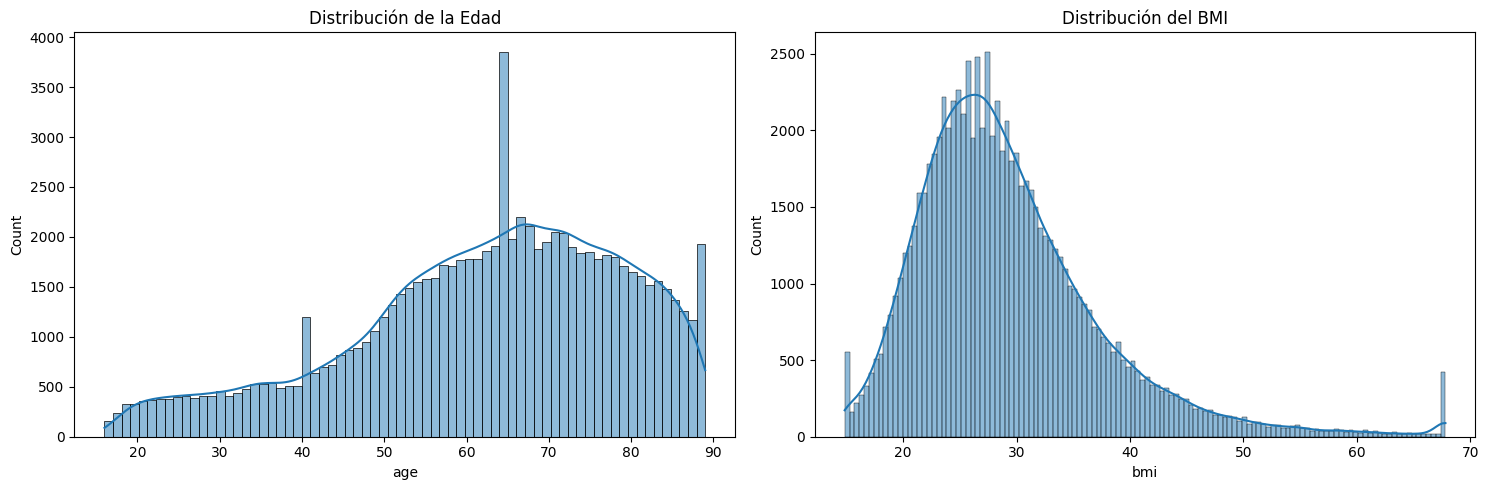

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Ajustando las variables para el EDA
variables_to_analyze = ['age', 'bmi']

# Creando un subconjunto del dataset para el EDA
eda_subset = data[variables_to_analyze].dropna(subset=['age', 'bmi'])


# Visualizaciones
plt.figure(figsize=(15, 5))

# Histograma para la edad
plt.subplot(1, 2, 1)
sns.histplot(eda_subset['age'], kde=True)
plt.title('Distribución de la Edad')

# Histograma para el BMI
plt.subplot(1, 2, 2)
sns.histplot(eda_subset['bmi'], kde=True)
plt.title('Distribución del BMI')

plt.tight_layout()
plt.show()





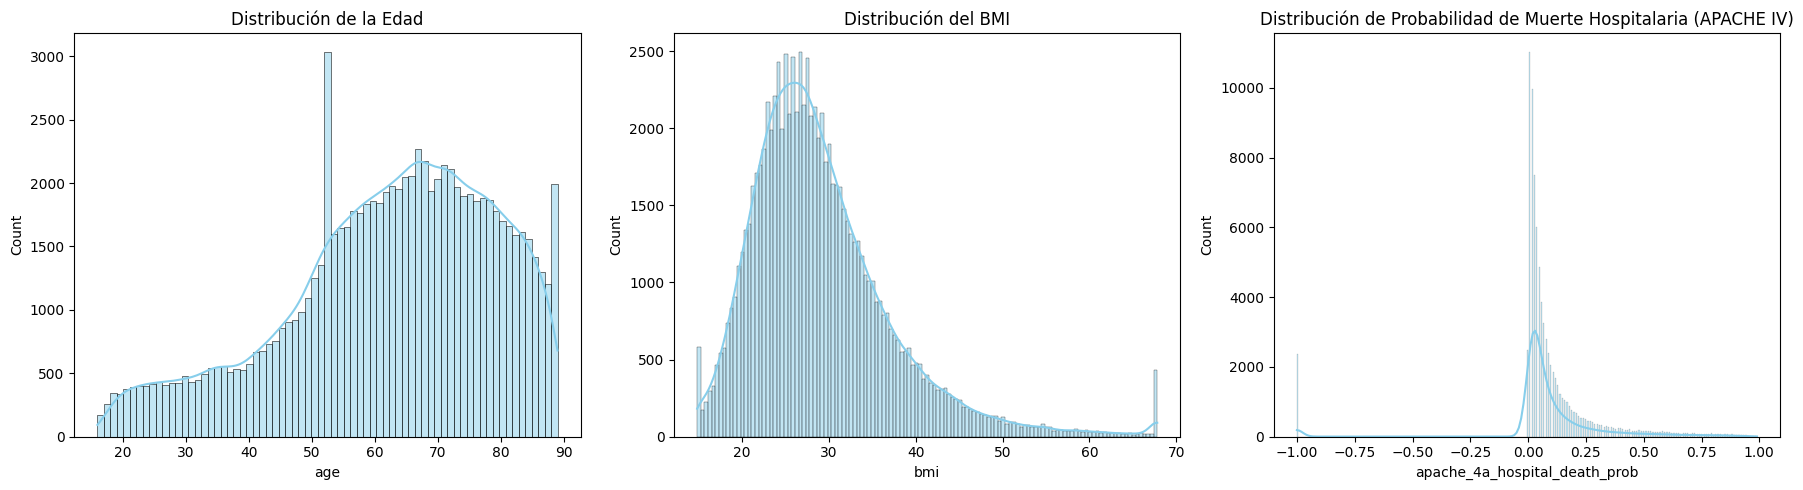

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generando las visualizaciones para incluir en la presentación

# Creando una figura con múltiples subplots para las visualizaciones
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histograma para la Edad
sns.histplot(data['age'].dropna(), kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribución de la Edad')

# Histograma para el BMI
sns.histplot(data['bmi'].dropna(), kde=True, ax=axs[1], color='skyblue')
axs[1].set_title('Distribución del BMI')

# Histograma para Apache 4a Hospital Death Probability
sns.histplot(data['apache_4a_hospital_death_prob'].dropna(), kde=True, ax=axs[2], color='skyblue')
axs[2].set_title('Distribución de Probabilidad de Muerte Hospitalaria (APACHE IV)')

# Ajustando la visualización
plt.tight_layout()


plt.show()

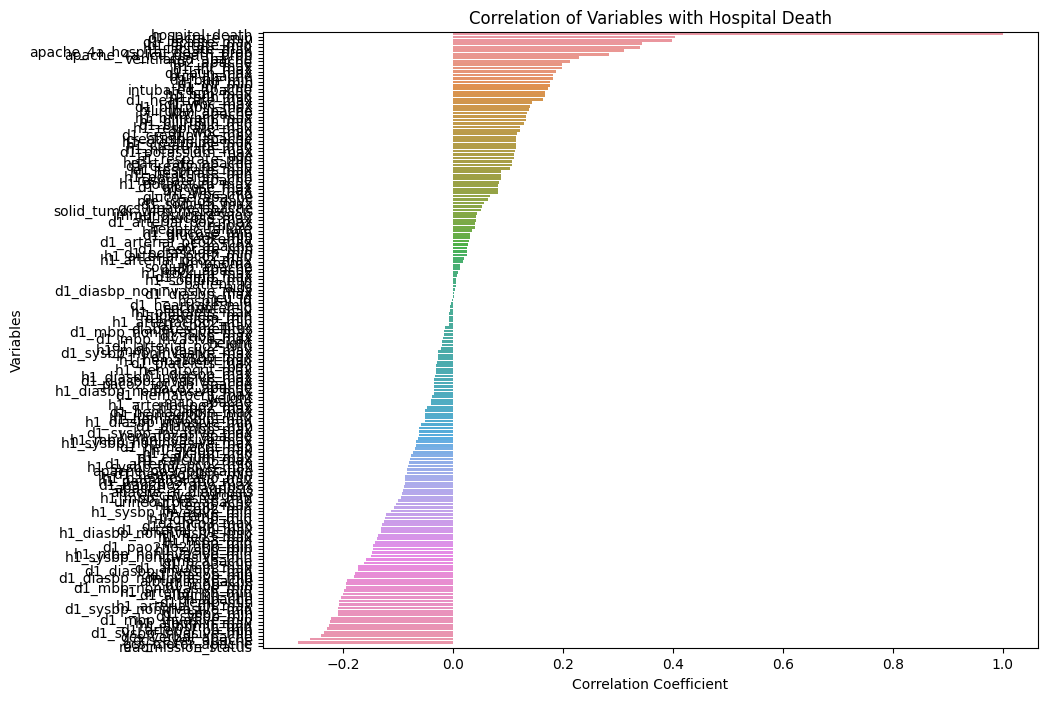

hospital_death           1.000000
d1_lactate_min           0.403614
d1_lactate_max           0.399029
h1_lactate_min           0.344046
h1_lactate_max           0.340951
                           ...   
d1_sysbp_invasive_min   -0.234382
gcs_verbal_apache       -0.241044
gcs_eyes_apache         -0.260373
gcs_motor_apache        -0.282449
readmission_status            NaN
Name: hospital_death, Length: 178, dtype: float64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Para el análisis de los factores de riesgo nos centraremos en variables numéricas y su correlación con la muerte hospitalaria.

# Seleccionar columnas numéricas para el análisis de correlación
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_data = data[numerical_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Centrándose en la correlación con hospital_muerte
correlation_with_death = correlation_matrix['hospital_death'].sort_values(ascending=False)

# Trazar la correlación de diferentes variables con hospital_muerte
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_death.values, y=correlation_with_death.index)
plt.title('Correlation of Variables with Hospital Death')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

correlation_with_death

# Insights de Factores de Riesgo:
* Hay varias variables con correlaciones significativas con la mortalidad hospitalaria (hospital_death).

* Las variables relacionadas con los niveles de lactato (**d1_lactate_min, d1_lactate_max, h1_lactate_min, h1_lactate_max**) muestran una correlación positiva relativamente alta. Esto indica que niveles más altos de lactato están asociados con un mayor riesgo de muerte en el hospital.

* Algunas medidas de la Escala de Coma de Glasgow (gcs_verbal_apache, gcs_eyes_apache, gcs_motor_apache) tienen una correlación negativa moderada. Esto sugiere que puntuaciones más bajas en la Escala de Coma de Glasgow, lo que indica un estado de conciencia reducido, están asociadas con un mayor riesgo de mortalidad.

* Cabe destacar que la correlación no implica causalidad, pero estos resultados pueden ser útiles para identificar pacientes en mayor riesgo y para investigaciones posteriores.

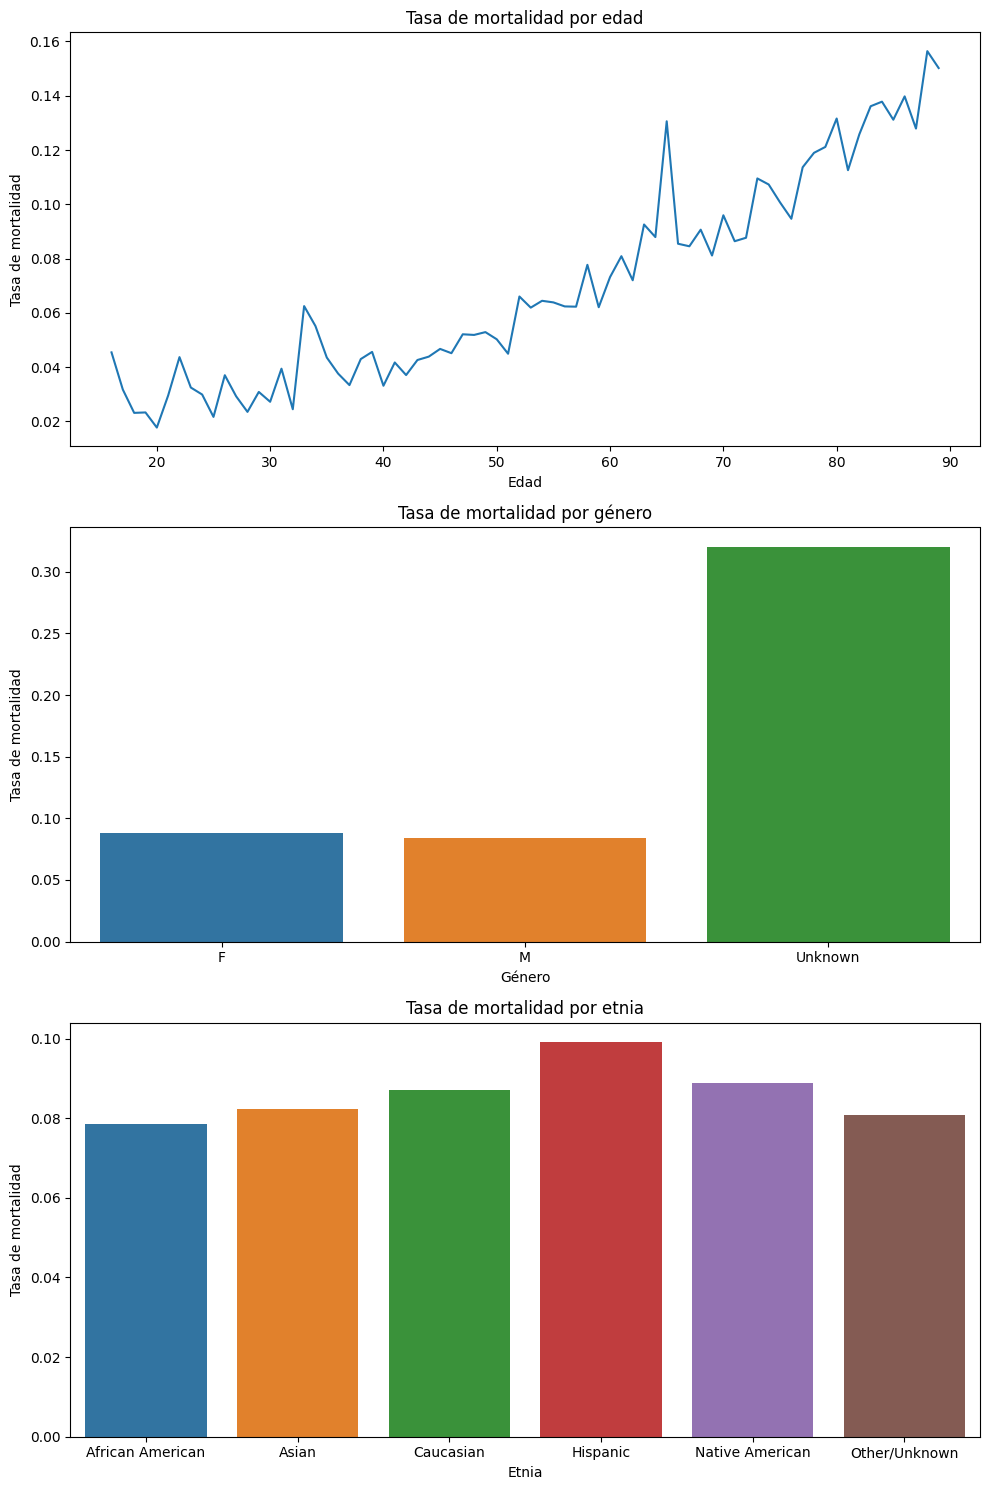

(age
 16.0    0.045455
 17.0    0.031746
 18.0    0.023166
 19.0    0.023324
 20.0    0.017751
           ...   
 85.0    0.131171
 86.0    0.139768
 87.0    0.127907
 88.0    0.156430
 89.0    0.150210
 Name: hospital_death, Length: 74, dtype: float64,
 gender
 F          0.088373
 M          0.084417
 Unknown    0.320000
 Name: hospital_death, dtype: float64,
 ethnicity
 African American    0.078559
 Asian               0.082374
 Caucasian           0.087030
 Hispanic            0.099052
 Native American     0.088832
 Other/Unknown       0.080704
 Name: hospital_death, dtype: float64)

In [5]:
# Continuando con el análisis demográfico para examinar las tasas de mortalidad en diferentes grupos demográficos.

# Nos centraremos en 'age', 'gender', 'ethnicity' y su relación con la "hospital_death".

# Primero, manejemos los valores faltantes en estas columnas mediante métodos de imputación simples.

# Para 'age', usaremos el valor mediano y para 'ethnicity', usaremos la moda (valor más frecuente).
# Para 'gender', Si faltan valores, los clasificaremos como 'Unknown'.
data['age'].fillna(data['age'].median(), inplace=True)
data['ethnicity'].fillna(data['ethnicity'].mode()[0], inplace=True)
data['gender'].fillna('Unknown', inplace=True)


# Agrupar datos por 'age', 'gender', 'ethnicity' y calcular las tasas de mortalidad.
age_grouped = data.groupby('age')['hospital_death'].mean()
gender_grouped = data.groupby('gender')['hospital_death'].mean()
ethnicity_grouped = data.groupby('ethnicity')['hospital_death'].mean()

# Plotting los resultados
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Age
sns.lineplot(x=age_grouped.index, y=age_grouped.values, ax=axes[0])
axes[0].set_title('Tasa de mortalidad por edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Tasa de mortalidad')

# Gender
sns.barplot(x=gender_grouped.index, y=gender_grouped.values, ax=axes[1])
axes[1].set_title('Tasa de mortalidad por género')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Tasa de mortalidad')

# Ethnicity
sns.barplot(x=ethnicity_grouped.index, y=ethnicity_grouped.values, ax=axes[2])
axes[2].set_title('Tasa de mortalidad por etnia')
axes[2].set_xlabel('Etnia')
axes[2].set_ylabel('Tasa de mortalidad')

plt.tight_layout()
plt.show()

# Salida para nanálisis de datos
age_grouped, gender_grouped, ethnicity_grouped

# Insights de Enfermedades y Condiciones:
* Cirrosis y Fallido Hepático (Hepatic Failure) tienen una prevalencia significativamente mayor en pacientes que fallecieron en el hospital en comparación con aquellos que sobrevivieron.

* Inmunosupresión, Leucemia, Linfoma, y Tumor Sólido con Metástasis también muestran una mayor prevalencia en pacientes que fallecieron, aunque en menor medida.

* Curiosamente, la prevalencia de Diabetes Mellitus es ligeramente mayor en pacientes que sobrevivieron. Esto puede ser debido a una mejor gestión de la condición o a otros factores no explorados en este análisis.

* La Enfermedad por VIH/SIDA (AIDS) tiene una baja prevalencia en general, pero es ligeramente más alta en pacientes que fallecieron.

# Interpretación y Consideraciones:
* Estos resultados sugieren que ciertas condiciones médicas están más asociadas con la mortalidad hospitalaria.

* Es importante recordar que estos insights no establecen causalidad directa, sino que indican asociaciones que podrían ser exploradas más a fondo en estudios clínicos o investigaciones.

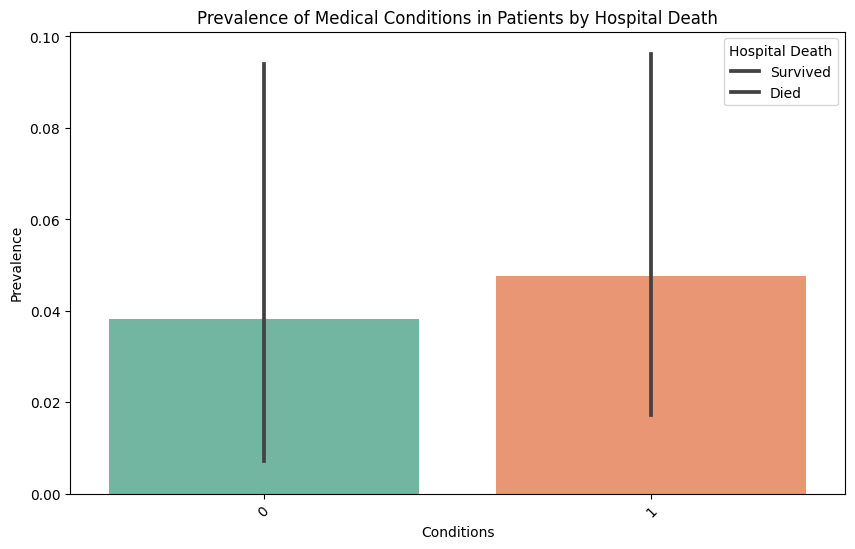

hospital_death,0,1
aids,0.000818,0.001277
cirrhosis,0.014188,0.031673
diabetes_mellitus,0.227215,0.203704
hepatic_failure,0.011639,0.027331
immunosuppression,0.024012,0.049042
leukemia,0.006301,0.015198
lymphoma,0.003763,0.008046
solid_tumor_with_metastasis,0.018409,0.044317


In [ ]:
# Se continúa con el análisis de las enfermedades y condiciones prevalentes en los pacientes que fallecieron en el hospital.

# Seleccionar columnas relacionadas con condiciones médicas
medical_conditions = [
    'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
    'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'
]

# Crear un subconjunto de datos centrados en estas condiciones y la muerte hospitalaria.
condition_data = data[medical_conditions + ['hospital_death']]

# Calcular la prevalencia de cada afección en pacientes que murieron y que sobrevivieron
condition_prevalence = condition_data.groupby('hospital_death').mean()

# Plotting los resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=condition_prevalence.T, palette="Set2")
plt.title('Prevalence of Medical Conditions in Patients by Hospital Death')
plt.xlabel('Conditions')
plt.ylabel('Prevalence')
plt.xticks(rotation=45)
plt.legend(title='Hospital Death', labels=['Survived', 'Died'])
plt.show()

condition_prevalence.T  # Transposing para una mejor lectura


# Insights de Eficiencia del Tratamiento:
1. Cirugía Electiva (Elective Surgery) y Postoperatorio Apache (Apache Post Operative):

  * Ambos tienen una prevalencia menor en pacientes que fallecieron en comparación con aquellos que sobrevivieron. Esto podría indicar que los pacientes que no estaban en condiciones de someterse a cirugías electivas o que no estaban en postoperatorio tenían un mayor riesgo de mortalidad.

2. Uso de Ventilador (Ventilated Apache):

  * Hay una prevalencia significativamente mayor de uso de ventilador en pacientes que fallecieron. Esto sugiere que la necesidad de ventilación mecánica está asociada con una mayor gravedad de la enfermedad y un mayor riesgo de mortalidad.

3. Presión Arterial Invasiva (Diasbp y Sysbp Invasive):

  * Los pacientes que fallecieron tenían en promedio valores más bajos de presión arterial diastólica y sistólica invasiva, tanto máximos como mínimos. Esto puede reflejar estados más críticos o inestables en estos pacientes.

4. Insuficiencia Renal Aguda (ARF Apache):

  * Aunque la prevalencia de insuficiencia renal aguda es generalmente baja, es ligeramente mayor en pacientes que fallecieron.



# Modelo implementado
Árbol de Decisión


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



# Separando las variables categóricas y numéricas
categorical_cols = data.select_dtypes(include=['object']).columns
numeric_cols = data.select_dtypes(exclude=['object']).columns

# Codificación One-Hot para variables categóricas
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_cols])

# Creando DataFrame con datos codificados
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Imputación para datos numéricos
imputer = SimpleImputer(strategy='median')
imputed_numeric_data = imputer.fit_transform(data[numeric_cols])

# Creando DataFrame para los datos numéricos imputados
imputed_numeric_df = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Concatenando los datos numéricos imputados y los datos categóricos codificados
processed_data = pd.concat([imputed_numeric_df, encoded_categorical_df], axis=1)

# Seleccionando características y variable objetivo
X = processed_data.drop('hospital_death', axis=1)  # Asumiendo 'hospital_death' como objetivo
y = processed_data['hospital_death']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando y entrenando el modelo de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = dt_classifier.predict(X_test)

# Evaluación del modelo
classification_report_dt = classification_report(y_test, y_pred)
confusion_matrix_dt = confusion_matrix(y_test, y_pred)

print(classification_report_dt)
print(confusion_matrix_dt)

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     16756
         1.0       0.35      0.38      0.36      1587

    accuracy                           0.88     18343
   macro avg       0.64      0.66      0.65     18343
weighted avg       0.89      0.88      0.89     18343

[[15598  1158]
 [  977   610]]


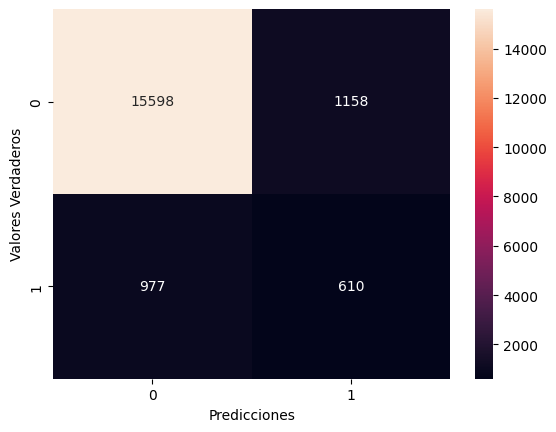

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

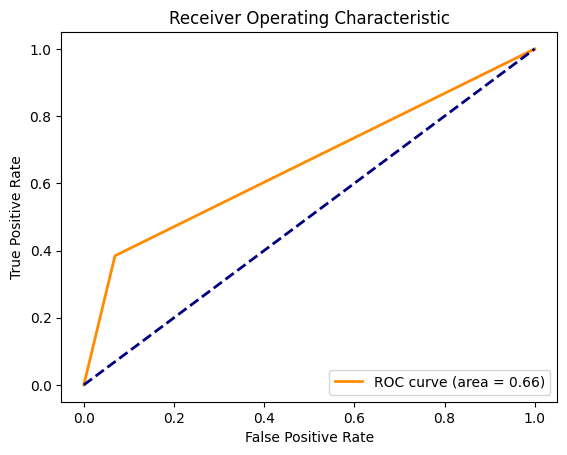

In [53]:
from sklearn.metrics import roc_curve, auc

# Calcular las tasas de verdaderos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<Axes: >

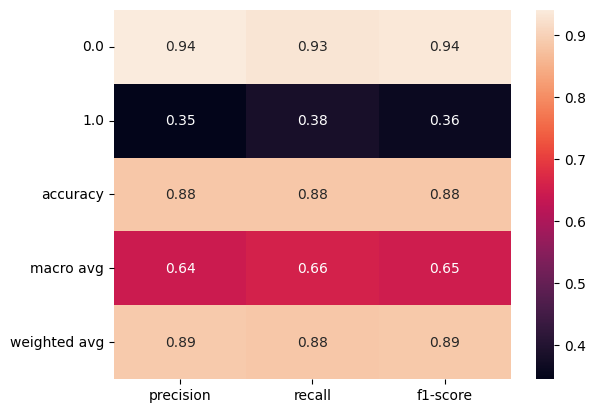

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

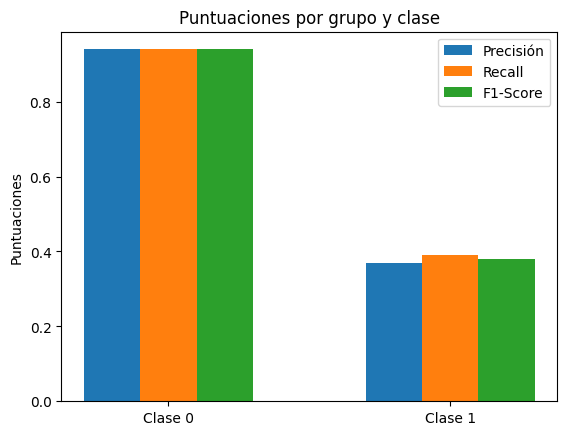

In [56]:
import numpy as np


labels = ['Clase 0', 'Clase 1']
precision = [0.94, 0.37]
recall = [0.94, 0.39]
f1_score = [0.94, 0.38]

x = np.arange(len(labels))  # localización de las etiquetas
width = 0.2  # ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y etiquetas personalizadas de los ejes
ax.set_ylabel('Puntuaciones')
ax.set_title('Puntuaciones por grupo y clase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

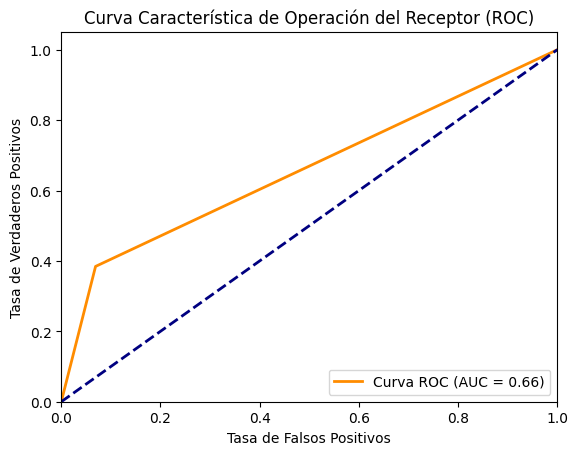

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Obtener probabilidades de la clase positiva (1.0)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Calcular tasas de verdaderos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Crear la figura para el gráfico
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Conclusión

Este modelo de clasificación, optimizado con parámetros específicos, es eficaz en identificar correctamente la mayoría de los casos de la clase predominante (0.0) con una alta precisión y sensibilidad (94%). Sin embargo, su rendimiento es moderado al identificar la clase minoritaria (1.0), con una precisión de 37% y un recall de 39%.

En términos generales, el modelo tiene una exactitud global del 89%, lo que indica que es bastante bueno en predecir los resultados correctamente en la mayoría de los casos. Este modelo puede ser especialmente útil en situaciones donde es crítico identificar la mayoría de los casos de la clase mayoritaria, mientras que también proporciona una capacidad razonable para detectar casos de la clase minoritaria

# Interpretación y Consideraciones:

* Estos resultados proporcionan una visión de cómo ciertos tratamientos y medidas clínicas están relacionados con los resultados de mortalidad en el hospital.
* Es crucial recordar que estos insights no establecen causalidad y deben ser interpretados en el contexto de la complejidad clínica de cada paciente.